# **MNIST-DIGIT CLASSIFIER**

**Vyom Verma 2022**




## Introduction

Importing necessary libraries such as tensorflow, numpy and matplotlib. 

*   [Tensorflow](https://https://www.tensorflow.org/), An open source library which will be used to implement the Deep Neural Network and other preprocessing tasks.
*   [NumPy](https://https://numpy.org/) is used for various numerical tasks to be performed on the data before and after training.
*   [Matplotlib](https://https://matplotlib.org/) will be used for plotting our data, in this case images.





In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MNIST Handwritten Digit dataset contains 28 X 28 px images of handwritten single digits. The dataset is available in tensorflow via the datasets API. The data is already divided into training and testing, furthermore into features and labels.

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print('There are {} images for training and {} for testing'.format(train_images.shape[0], test_images.shape[0]))

There are 60000 images for training and 10000 for testing


60000 images are available for training the model and 10000 are available for training. Fortunately, the data is already clean and ordered, we don't need to perform any preprocessing.

Label: 0


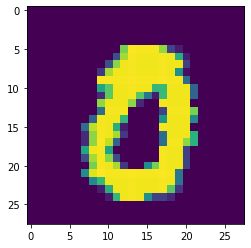

In [ ]:
index = 69
plt.imshow(train_images[index])
print("Label: {}".format(train_labels[index]))

By changing the index value we can visualize various different images and their labels in the dataset.

## Model definition and training

Now we will define our model, we will implement a CNN(Convolutional Neural Network) which is widely used to fetch prominent features from the images by applying convolutions and maxpooling layers on the image. The model is defined below, it's fun to experiment with different layers and see the effect on loss and accuracy.  The function summary looks like the following.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
                            ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Before flattening the layers we have 64 5x5 images, which contains the features for an image in a condensed form. We will use the [Sparse Categorical Crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) as we wish to achieve multi-class classification. The optimizer used is [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) which is optimal for this case, although SGD(Stochastic Gradient Descent) would also have worked.

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

### Training
Training of the model begins!

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9536
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0203 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

We trained the model for 10 epochs, let's plot the training loss on each epoch, to see the descent.

<Figure size 432x288 with 0 Axes>

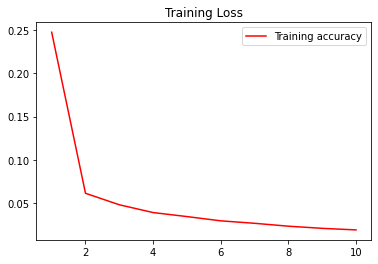

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot([i for i in range(1, 11)], loss, 'r', label='Training accuracy')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()

As it is visible that loss gradually decreases on each epoch which is a good indicator, the accuracy also seems good, but we will need to make sure that we are not overfitting. For that we will test our model on the test dataset, which conatains the images it has not seen before.

## Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0564 - accuracy: 0.9885 - 709ms/epoch - 2ms/step

Test accuracy: 0.9884999990463257


The model gives approx. 98.8% accuracy on the validation set, which is pretty decent. Let's see the result by running the model on one image at index position in test dataset.

In [ ]:
index = 69
pred = model.predict(np.array([test_images[index]]))

Predicted Value: 0


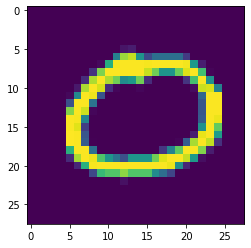

In [ ]:
plt.imshow(test_images[index])
print("Predicted Value: {}".format(list(pred[0]).index(max(pred[0]))))

The image was correctly classified! Now we can save the entire model in a folder, and the deploy the same on the web.

## Exporting
We can call model.save() to save the entire model in a directory and then move the directory to our app folder in Django.

In [ ]:
!mkdir -p saved_model
model.save('saved_model/mnist')

INFO:tensorflow:Assets written to: saved_model/mnist/assets


INFO:tensorflow:Assets written to: saved_model/mnist/assets


In [ ]:
import shutil
shutil.make_archive('mnist_model', 'zip', 'saved_model/mnist')

'/content/mnist_model.zip'